In [1]:
import pandas as pd
df = pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [2]:
df.shape

(400, 12)

In [3]:
# EDA
# DATA CLEANING
df.isnull().sum()

Unnamed: 0     0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
 11  high         400 non-null    object
dtypes: int64(8), object(4)
memory usage: 37.6+ KB


In [5]:
# Data Transformation
x_cont= df[df.columns[[1,2,3,4,5,7]]]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df.columns[[1,2,3,4,5,7]])
SS_X

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"]     = LE.fit_transform(df["Urban"])
df["US"]        = LE.fit_transform(df["US"])
df["high"]      = LE.fit_transform(df["high"])
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,0,42,17,1,1,1
1,2,111,48,16,260,83,1,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,4,117,100,4,466,97,2,55,14,1,1,0
4,5,141,64,3,340,128,0,38,13,1,0,0


In [6]:
df.info()
df_cat = df[df.columns[[6,8,9,10,11]]]

df_new = pd.concat([SS_X,df_cat],axis=1)
df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
 11  high         400 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 31.4 KB


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc,Education,Urban,US,high
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,0,17,1,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,1,10,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,2,12,1,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,2,14,1,1,0
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,0,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,1,14,1,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,2,11,0,1,0
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,2,18,1,1,0
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,0,12,1,1,0


In [7]:
# data partition
Y = df_new["high"]
X = df_new.drop(df_new[['high']],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [8]:
# Model Fitting
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)

# Model Prediction
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(Y_train,Y_pred_train)
test_accuracy  = accuracy_score(Y_test,Y_pred_test)
training_loss  = log_loss(Y_train,Y_pred_train)
test_loss  = log_loss(Y_test,Y_pred_test)

import numpy as np
print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))
print("trianing loss:", np.round(training_loss,2))
print("test loss:", np.round(test_loss,2))

trianing accuracy: 1.0
test accuracy: 0.66
trianing loss: 0.0
test loss: 12.31


In [9]:
# CROSS VALIDATION USING SHUFFLE SPLIT
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.3, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))


cross validation: train accuracy: 1.0
cross validation: test accuracy: 0.72


In [10]:
# Model is OVERFITTED, we have to use PRUNING (max_depth)

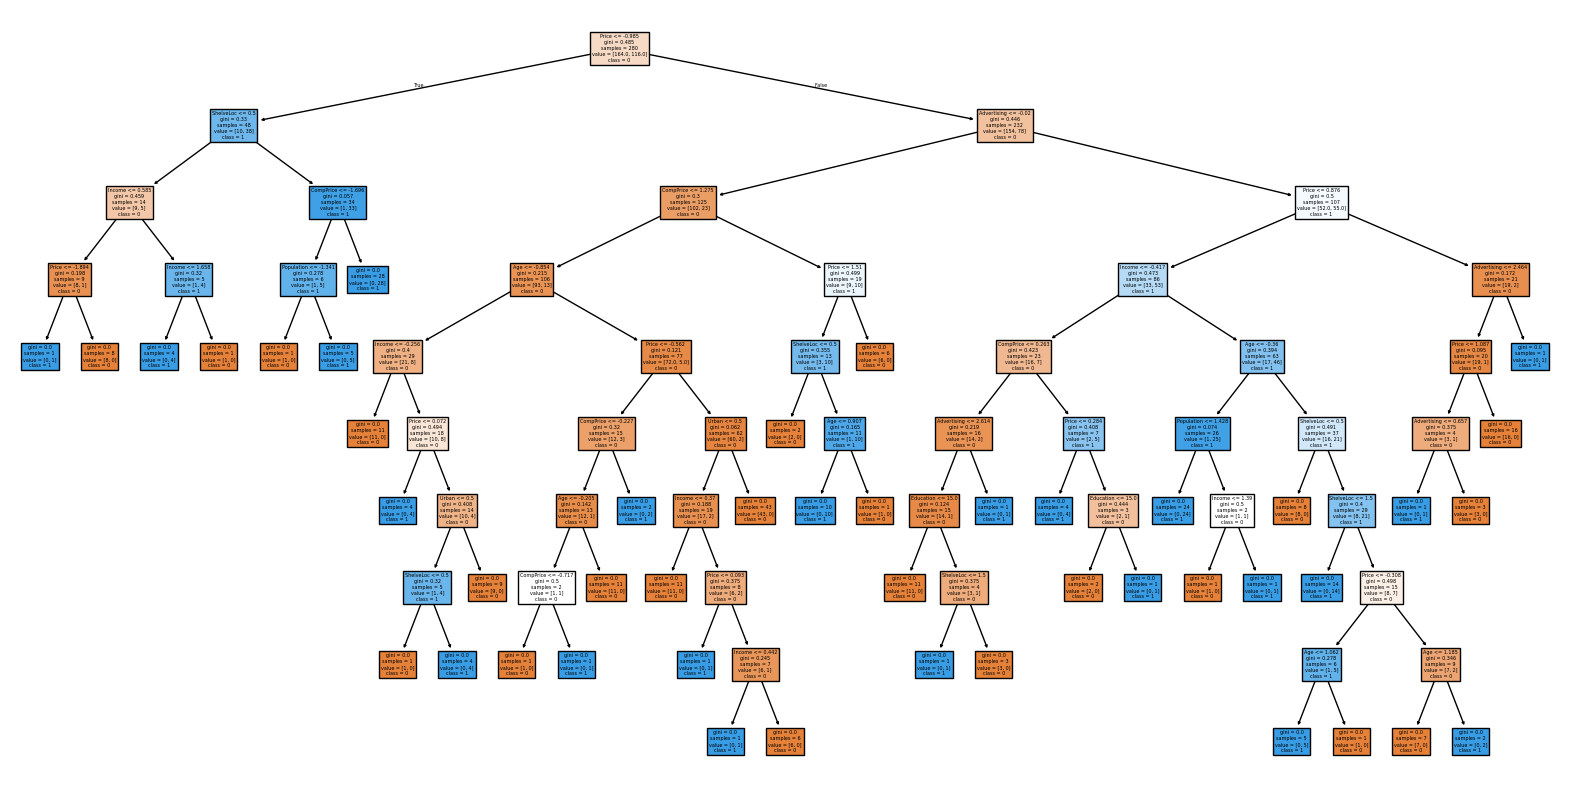

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    DT,  # Get the first fitted estimator from cross-validation
    filled=True,
    feature_names=X.columns,
    class_names=['0', '1'],
)
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
n_nodes = DT.tree_.node_count
depth = DT.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")


Number of nodes: 89
Depth of the tree: 9


In [13]:
# Model Fitting
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',max_depth=5) # try with 10,9,8,7,6,5
DT.fit(X_train,Y_train)

# Model Prediction
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(Y_train,Y_pred_train)
test_accuracy  = accuracy_score(Y_test,Y_pred_test)
training_loss  = log_loss(Y_train,Y_pred_train)
test_loss  = log_loss(Y_test,Y_pred_test)

import numpy as np
print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))
print("trianing loss:", np.round(training_loss,2))
print("test loss:", np.round(test_loss,2))

trianing accuracy: 0.87
test accuracy: 0.7
trianing loss: 4.63
test loss: 10.81


In [14]:
# CROSS VALIDATION USING SHUFFLE SPLIT
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.3, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))


cross validation: train accuracy: 1.0
cross validation: test accuracy: 0.72


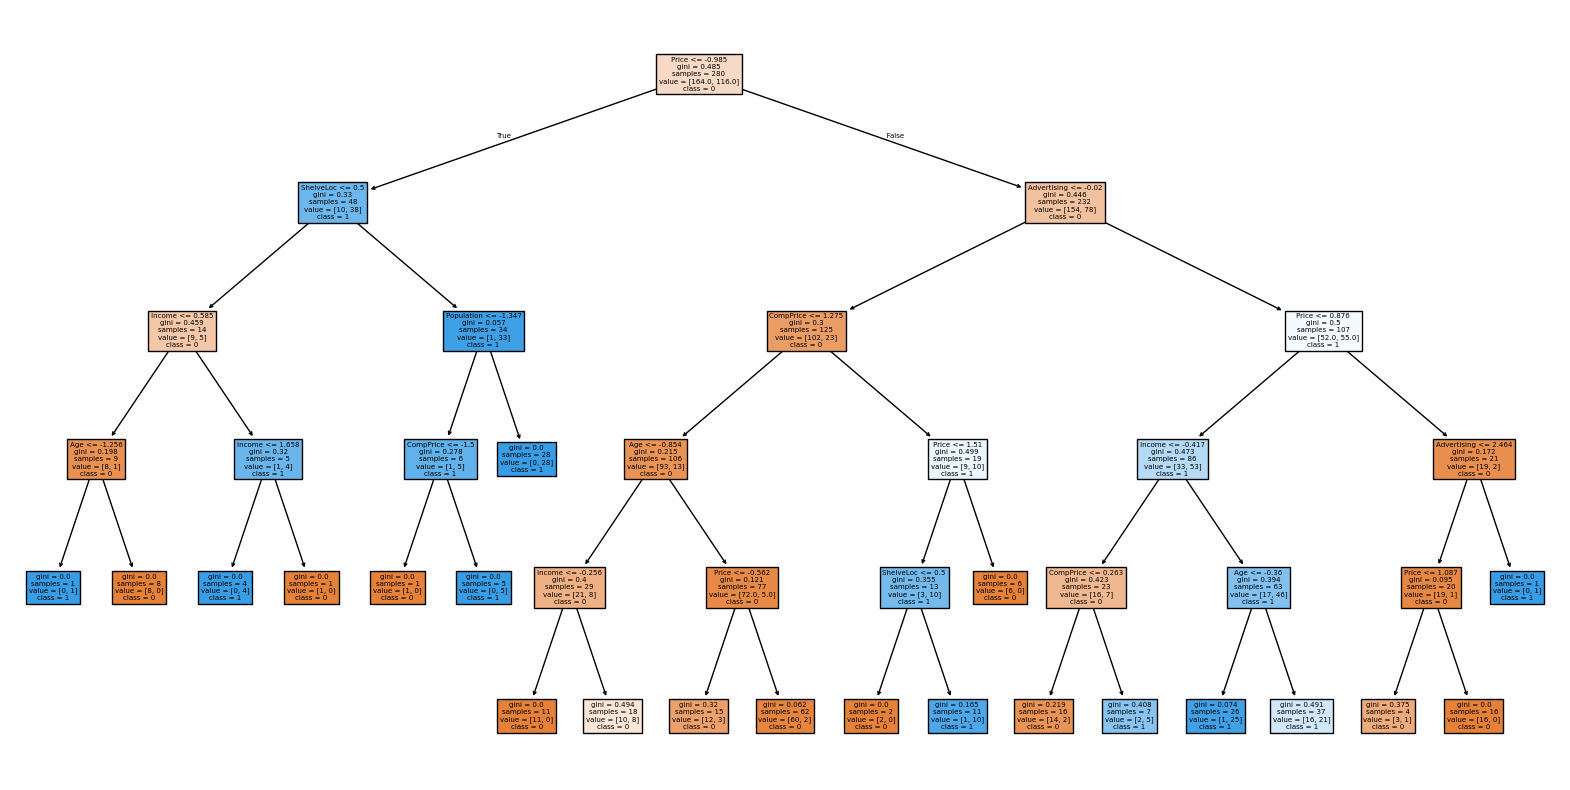

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    DT,  # Get the first fitted estimator from cross-validation
    filled=True,
    feature_names=X.columns,
    class_names=['0', '1'],
)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
n_nodes = DT.tree_.node_count
depth = DT.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")


Number of nodes: 41
Depth of the tree: 5


In [17]:
# Model Fitting with Bagging having DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                   n_estimators=100, random_state=42,
                                   max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train,Y_train)

# Model Prediction
Y_pred_train_bagging = bagging_model.predict(X_train)
Y_pred_test_bagging = bagging_model.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy_bagging  = accuracy_score(Y_train,Y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test,Y_pred_test_bagging)
training_loss_bagging  = log_loss(Y_train,Y_pred_train_bagging)
test_loss_bagging  = log_loss(Y_test,Y_pred_test_bagging)

import numpy as np
print("Bagging training accuracy:", np.round(training_accuracy_bagging,2))
print("Bagging test accuracy:", np.round(test_accuracy_bagging,2))
print("Bagging training loss:", np.round(training_loss_bagging,2))
print("Bagging test loss:", np.round(test_loss_bagging,2))


Bagging training accuracy: 1.0
Bagging test accuracy: 0.71
Bagging training loss: 0.13
Bagging test loss: 10.51


In [18]:
# Model Fitting with Bagging having Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(estimator=LogisticRegression(),
                                   n_estimators=100, random_state=42,
                                   max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train,Y_train)

# Model Prediction
Y_pred_train_bagging = bagging_model.predict(X_train)
Y_pred_test_bagging = bagging_model.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy_bagging  = accuracy_score(Y_train,Y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test,Y_pred_test_bagging)
training_loss_bagging  = log_loss(Y_train,Y_pred_train_bagging)
test_loss_bagging  = log_loss(Y_test,Y_pred_test_bagging)

import numpy as np
print("LR training accuracy:", np.round(training_accuracy_bagging,2))
print("LR test accuracy:", np.round(test_accuracy_bagging,2))
print("LR training loss:", np.round(training_loss_bagging,2))
print("LR test loss:", np.round(test_loss_bagging,2))

LR training accuracy: 0.83
LR test accuracy: 0.8
LR training loss: 6.18
LR test loss: 7.21


In [19]:
# Model Fitting with Bagging having SVM
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(estimator=SVC(),
                                   n_estimators=100, random_state=42,
                                   max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train,Y_train)

# Model Prediction
Y_pred_train_bagging = bagging_model.predict(X_train)
Y_pred_test_bagging = bagging_model.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy_bagging  = accuracy_score(Y_train,Y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test,Y_pred_test_bagging)
training_loss_bagging  = log_loss(Y_train,Y_pred_train_bagging)
test_loss_bagging  = log_loss(Y_test,Y_pred_test_bagging)

import numpy as np
print("SVC training accuracy:", np.round(training_accuracy_bagging,2))
print("SVC test accuracy:", np.round(test_accuracy_bagging,2))
print("SVC training loss:", np.round(training_loss_bagging,2))
print("SVC test loss:", np.round(test_loss_bagging,2))

SVC training accuracy: 0.72
SVC test accuracy: 0.71
SVC training loss: 10.04
SVC test loss: 10.51


In [20]:
# Model Fitting with Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42,
                            max_samples=0.6,max_features=0.7)
RF.fit(X_train,Y_train)

# Model Prediction
Y_pred_train_RF = RF.predict(X_train)
Y_pred_test_RF = RF.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score, log_loss
training_accuracy_RF  = accuracy_score(Y_train,Y_pred_train_RF)
test_accuracy_RF = accuracy_score(Y_test,Y_pred_test_RF)
training_loss_RF  = log_loss(Y_train,Y_pred_train_RF)
test_loss_RF = log_loss(Y_test,Y_pred_test_RF)

import numpy as np
print("RF training accuracy:", np.round(training_accuracy_RF,2))
print("RF test accuracy:", np.round(test_accuracy_RF,2))
print("RF training loss:", np.round(training_loss_RF,2))
print("RF test loss:", np.round(test_loss_RF,2))

RF training accuracy: 1.0
RF test accuracy: 0.73
RF training loss: 0.13
RF test loss: 9.61
